In [79]:
import pandas as pd
import os
import re
import numpy as np
import math

path = "resources/Tablas_elecciones_barrio/"
files = ""
tables = []

In [2]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f
# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1")
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
# #     print(tmp_table.Total_votos_a_candidaturas)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", tmp_table.iloc[i,0].upper())
        tmp_table.iloc[i,0] = re.sub(" ", "", tmp_table.iloc[i,0].upper())
        if 'Á' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("Á", "A", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'É' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("É", "E", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Í' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Í", "I", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ó' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ó", "O", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ú' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ú", "U", str.strip(tmp_table.iloc[i,0].upper()))
        
    for j in range(0, len (tmp_table.columns)):
        if type(tmp_table.iloc[0,j]) is not str:
            tmp_table.iloc[:,j] = tmp_table.iloc[:,j].astype(np.float32)
            
            for i in range(0, len(tmp_table.iloc[:,j])):
                print(tmp_table.iloc[i,j])
                num_split = math.modf(tmp_table.iloc[i,j])
                num_split = [str(round(num_split[0],3)), str(num_split[1])]
                num_split[0] = re.sub("^[0](\.)", "", num_split[0])
                if num_split[0] == '0':
                    num_split[0] = ''
                num_split[1] = re.sub("(\.)[0]$", "", num_split[1])
                tmp_table.iloc[i,j] = int(num_split[1] + num_split[0])
                
                print(tmp_table.iloc[i,j], '*')
        
    tables.append(tmp_table)


# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones


17.845
17845.0 *
31.496
31496.0 *
7.755
7755.0 *
12.838
12838.0 *
23.738
23738.0 *
5.201
5201.0 *
5.379
5379.0 *
10.829
10829.0 *
2.466
2466.0 *
4.225
4225.0 *
7.683
7683.0 *
1.923
1923.0 *
47.0
47.0 *
56.0
56.0 *
16.0
16.0 *
22.0
22.0 *
48.0
48.0 *
6.0
6.0 *
50.0
50.0 *
94.0
94.0 *
27.0
27.0 *
37.0
37.0 *
56.0
56.0 *
9.0
9.0 *
12.369
12369.0 *
20.517
20517.0 *
5.246
5246.0 *
8.554
8554.0 *
15.951
15951.0 *
3.263
3263.0 *
66.0
66.0 *
107.0
107.0 *
24.0
24.0 *
47.0
47.0 *
78.0
78.0 *
13.0
13.0 *
0.0
0.0 *
6.0
6.0 *
2.0
2.0 *
1.0
1.0 *
3.0
3.0 *
1.0
1.0 *
1.149
1149.0 *
2.073
2073.0 *
449.0
449.0 *
686.0
686.0 *
1.428
1428.0 *
284.0
284.0 *
2.309
2309.0 *
2.548
2548.0 *
1.071
1071.0 *
1.979
1979.0 *
2.784
2784.0 *
688.0
688.0 *
5.0
5.0 *
7.0
7.0 *
2.0
2.0 *
6.0
6.0 *
13.0
13.0 *
0.0
0.0 *
1.0
1.0 *
0.0
0.0 *
0.0
0.0 *
0.0
0.0 *
2.0
2.0 *
1.0
1.0 *
1.622
1622.0 *
2.12
212.0 *
779.0
779.0 *
1.518
1518.0 *
2.296
2296.0 *
516.0
516.0 *
4.0
4.0 *
6.0
6.0 *
2.0
2.0 *
1.0
1.0 *
7.0
7.0 *
1.0
1.

4.0 *
2.0
2.0 *
0.0
0.0 *
1.0
1.0 *
2.0
2.0 *
1.222
1222.0 *
1.844
1844.0 *
805.0
805.0 *
1.891
1891.0 *
1.487
1487.0 *
1.003
1003.0 *
5.0
5.0 *
24.0
24.0 *
15.0
15.0 *
17.0
17.0 *
4.0
4.0 *
11.0
11.0 *
1.0
1.0 *
6.0
6.0 *
3.0
3.0 *
1.0
1.0 *
0.0
0.0 *
5.0
5.0 *
0.0
0.0 *
10.0
10.0 *
2.0
2.0 *
1.0
1.0 *
2.0
2.0 *
4.0
4.0 *
6.0
6.0 *
16.0
16.0 *
7.0
7.0 *
6.0
6.0 *
6.0
6.0 *
7.0
7.0 *
1.0
1.0 *
7.0
7.0 *
7.0
7.0 *
2.0
2.0 *
0.0
0.0 *
2.0
2.0 *
1.0
1.0 *
9.0
9.0 *
5.0
5.0 *
5.0
5.0 *
1.0
1.0 *
2.0
2.0 *
19.827
19827.0 *
26.351
26351.0 *
15.896
15896.0 *
16.89
1689.0 *
17.472
17472.0 *
16.553
16553.0 *
7.468
7468.0 *
7.763
7763.0 *
4.666
4666.0 *
6.834
6834.0 *
6.964
6964.0 *
6.217
6217.0 *
42.0
42.0 *
49.0
49.0 *
28.0
28.0 *
38.0
38.0 *
49.0
49.0 *
49.0
49.0 *
84.0
84.0 *
65.0
65.0 *
42.0
42.0 *
47.0
47.0 *
60.0
60.0 *
48.0
48.0 *
12.233
12233.0 *
18.474
18474.0 *
11.16
1116.0 *
9.971
9971.0 *
10.399
10399.0 *
10.239
10239.0 *
65.0
65.0 *
85.0
85.0 *
38.0
38.0 *
73.0
73.0 *
72.0
72.0 *
6

9269.0 *
2.705
2705.0 *
27.616
27616.0 *
47.0
47.0 *
123.0
123.0 *
101.0
101.0 *
193.0
193.0 *
51.0
51.0 *
14.0
14.0 *
165.0
165.0 *
1.0
1.0 *
13.0
13.0 *
9.0
9.0 *
16.0
16.0 *
3.0
3.0 *
3.0
3.0 *
18.0
18.0 *
1.352
1352.0 *
2.93
293.0 *
2.884
2884.0 *
5.722
5722.0 *
1.19
119.0 *
364.0
364.0 *
5.173
5173.0 *
1.377
1377.0 *
3.966
3966.0 *
3.951
3951.0 *
8.862
8862.0 *
2.762
2762.0 *
342.0
342.0 *
5.885
5885.0 *
1.0
1.0 *
5.0
5.0 *
4.0
4.0 *
17.0
17.0 *
6.0
6.0 *
0.0
0.0 *
14.0
14.0 *
2.0
2.0 *
2.0
2.0 *
2.0
2.0 *
11.0
11.0 *
0.0
0.0 *
1.0
1.0 *
4.0
4.0 *
1.323
1323.0 *
2.774
2774.0 *
2.797
2797.0 *
5.46
546.0 *
1.701
1701.0 *
729.0
729.0 *
4.573
4573.0 *
1.0
1.0 *
9.0
9.0 *
8.0
8.0 *
8.0
8.0 *
2.0
2.0 *
0.0
0.0 *
8.0
8.0 *
2.0
2.0 *
13.0
13.0 *
12.0
12.0 *
33.0
33.0 *
8.0
8.0 *
3.0
3.0 *
33.0
33.0 *
2.854
2854.0 *
6.539
6539.0 *
5.443
5443.0 *
9.513
9513.0 *
2.245
2245.0 *
922.0
922.0 *
8.568
8568.0 *
312.0
312.0 *
667.0
667.0 *
623.0
623.0 *
1.243
1243.0 *
216.0
216.0 *
80.0
80.0 *
944.

1.0
1.0 *
1.0
1.0 *
4.0
4.0 *
10.0
10.0 *
3.0
3.0 *
6.0
6.0 *
3.0
3.0 *
1.0
1.0 *
10.0
10.0 *
5.0
5.0 *
4.0
4.0 *
11.0
11.0 *
35.549
35549.0 *
44.818
44818.0 *
17.946
17946.0 *
15.858
15858.0 *
14.485
14485.0 *
9.537
9537.0 *
4.844
4844.0 *
1.158
1158.0 *
17.367
17367.0 *
13.036
13036.0 *
16.405
16405.0 *
6.517
6517.0 *
5.09
509.0 *
3.824
3824.0 *
2.222
2222.0 *
1.214
1214.0 *
309.0
309.0 *
3.934
3934.0 *
117.0
117.0 *
157.0
157.0 *
40.0
40.0 *
50.0
50.0 *
40.0
40.0 *
11.0
11.0 *
6.0
6.0 *
0.0
0.0 *
29.0
29.0 *
93.0
93.0 *
124.0
124.0 *
63.0
63.0 *
50.0
50.0 *
70.0
70.0 *
46.0
46.0 *
15.0
15.0 *
0.0
0.0 *
55.0
55.0 *
22.303
22303.0 *
28.132
28132.0 *
11.326
11326.0 *
10.668
10668.0 *
10.551
10551.0 *
7.258
7258.0 *
3.609
3609.0 *
849.0
849.0 *
13.349
13349.0 *
162.0
162.0 *
165.0
165.0 *
83.0
83.0 *
55.0
55.0 *
55.0
55.0 *
24.0
24.0 *
17.0
17.0 *
2.0
2.0 *
31.0
31.0 *
8.0
8.0 *
9.0
9.0 *
2.0
2.0 *
3.0
3.0 *
3.0
3.0 *
0.0
0.0 *
1.0
1.0 *
0.0
0.0 *
4.0
4.0 *
3.85
385.0 *
5.076
5076.0 *
1

572.0 *
11.0
11.0 *
7.0
7.0 *
1.0
1.0 *
15.0
15.0 *
25.0
25.0 *
7.0
7.0 *
10.0
10.0 *
4.0
4.0 *
1.0
1.0 *
1.0
1.0 *
1.0
1.0 *
6.0
6.0 *
4.0
4.0 *
0.0
0.0 *
4.0
4.0 *
3.0
3.0 *
7.0
7.0 *
5.0
5.0 *
3.0
3.0 *
11.0
11.0 *
5.0
5.0 *
3.0
3.0 *
8.0
8.0 *
1.0
1.0 *
11.0
11.0 *
6.0
6.0 *
7.0
7.0 *
16.0
16.0 *
20.0
20.0 *
2.0
2.0 *
7.0
7.0 *
4.0
4.0 *
4.0
4.0 *
7.0
7.0 *
0.0
0.0 *
6.0
6.0 *
9.0
9.0 *
0.0
0.0 *
8.0
8.0 *
2.0
2.0 *
19.0
19.0 *
7.0
7.0 *
3.0
3.0 *
11.0
11.0 *
11.0
11.0 *
6.0
6.0 *
15.0
15.0 *
2.0
2.0 *
15.162
15162.0 *
1.244
1244.0 *
5.505
5505.0 *
8.761
8761.0 *
5.244
5244.0 *
3.309
3309.0 *
583.0
583.0 *
2.049
2049.0 *
2.516
2516.0 *
1.204
1204.0 *
37.0
37.0 *
3.0
3.0 *
11.0
11.0 *
22.0
22.0 *
12.0
12.0 *
36.0
36.0 *
0.0
0.0 *
11.0
11.0 *
29.0
29.0 *
17.0
17.0 *
11.78
1178.0 *
658.0
658.0 *
3.434
3434.0 *
6.194
6194.0 *
4.011
4011.0 *
48.0
48.0 *
3.0
3.0 *
38.0
38.0 *
32.0
32.0 *
16.0
16.0 *
9.0
9.0 *
0.0
0.0 *
3.0
3.0 *
3.0
3.0 *
1.0
1.0 *
1.097
1097.0 *
126.0
126.0 *
697.0
697.

,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,3.0,1.0,0.0,7.0,12369.0,1.0,8.0,724.0,50.0,47.0
1,10829.0,EMBAJADORES,28.0,31496.0,212.0,CENTRO,7.0,1443.0,12.0,11166.0,...,14.0,6.0,6.0,7.0,20517.0,0.0,11.0,949.0,94.0,56.0
2,2466.0,CORTES,6.0,7755.0,779.0,CENTRO,2.0,188.0,1.0,241.0,...,1.0,3.0,2.0,2.0,5246.0,0.0,3.0,300.0,27.0,16.0
3,4225.0,JUSTICIA,9.0,12838.0,1518.0,CENTRO,6.0,183.0,4.0,3502.0,...,0.0,0.0,1.0,6.0,8554.0,0.0,13.0,594.0,37.0,22.0
4,7683.0,UNIVERSIDAD,19.0,23738.0,2296.0,CENTRO,13.0,527.0,4.0,7932.0,...,6.0,5.0,3.0,6.0,15951.0,2.0,11.0,822.0,56.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3309.0,ALAMEDADEOSUNA,9.0,15162.0,2871.0,BARAJAS,6.0,174.0,2.0,3447.0,...,2.0,0.0,9.0,10.0,1178.0,1.0,14.0,945.0,36.0,37.0
127,583.0,AEROPUERTO,0.0,1244.0,122.0,BARAJAS,1.0,12.0,0.0,249.0,...,0.0,2.0,0.0,0.0,658.0,0.0,0.0,70.0,0.0,3.0
128,2049.0,CASCOHISTORICODEBARAJAS,4.0,5505.0,661.0,BARAJAS,3.0,61.0,1.0,955.0,...,3.0,3.0,3.0,0.0,3434.0,1.0,0.0,343.0,11.0,11.0
129,2516.0,TIMON,3.0,8761.0,1636.0,BARAJAS,1.0,103.0,3.0,1926.0,...,4.0,1.0,3.0,5.0,6194.0,1.0,11.0,511.0,29.0,22.0


In [3]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")


In [4]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.iloc[:,1:10] = main_table_padron.iloc[:,1:10].astype(int)
main_table_padron

,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263,238,501,56,50,106,319,288,607,CENTRO,PALACIO
1,5 - 9,235,265,500,43,38,81,278,303,581,CENTRO,PALACIO
2,10 - 14,227,238,465,30,38,68,257,276,533,CENTRO,PALACIO
3,15 - 19,234,282,516,44,55,99,278,337,615,CENTRO,PALACIO
4,20 - 24,323,346,669,161,212,373,484,558,1042,CENTRO,PALACIO
...,...,...,...,...,...,...,...,...,...,...,...,...
2719,80 - 84,72,96,168,2,4,6,74,100,174,BARAJAS,TIMON
2720,85 - 89,47,91,138,1,3,4,48,94,142,BARAJAS,TIMON
2721,90 - 94,22,44,66,0,2,2,22,46,68,BARAJAS,TIMON
2722,95 - 99,7,9,16,0,1,1,7,10,17,BARAJAS,TIMON


In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])
# work_table.head()
#work_table.iloc[:,2:26] = work_table.iloc[:,2:26].astype(int)
#work_table.iloc[:,0:26] = work_table.iloc[:,0:26].replace(".","")
work_table

,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total
0,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,0 - 4,263,238,501,56,50,106,319,288,607
1,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,5 - 9,235,265,500,43,38,81,278,303,581
2,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,10 - 14,227,238,465,30,38,68,257,276,533
3,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,15 - 19,234,282,516,44,55,99,278,337,615
4,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,20 - 24,323,346,669,161,212,373,484,558,1042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,2516.0,TIMON,3.0,8761.0,1636.0,BARAJAS,1.0,103.0,3.0,1926.0,...,80 - 84,72,96,168,2,4,6,74,100,174
2679,2516.0,TIMON,3.0,8761.0,1636.0,BARAJAS,1.0,103.0,3.0,1926.0,...,85 - 89,47,91,138,1,3,4,48,94,142
2680,2516.0,TIMON,3.0,8761.0,1636.0,BARAJAS,1.0,103.0,3.0,1926.0,...,90 - 94,22,44,66,0,2,2,22,46,68
2681,2516.0,TIMON,3.0,8761.0,1636.0,BARAJAS,1.0,103.0,3.0,1926.0,...,95 - 99,7,9,16,0,1,1,7,10,17


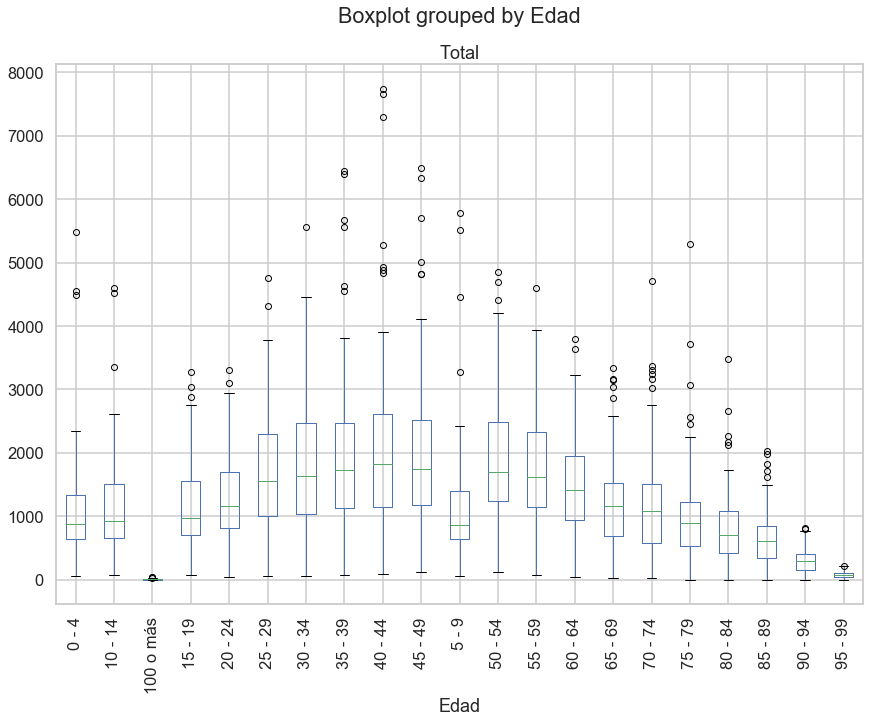

In [115]:
#Diagrama de cajas con los rangos de edad totales en Madrid, contando extranjeros y locales.
out = work_table.boxplot('Total', by='Edad', rot=90)

In [111]:
# Selección de las personas de 20 a 34 años
rangos_edades = pd.unique(work_table.Edad)
rango_edades = np.delete(rangos_edades, [0,1,2,3])
rango_infantes =np.delete(rangos_edades, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
Adultos = np.delete(rangos_edades, [6,7,8,9,10,11,12,13,14,15,16])

# Fuciones para consultar la tabla general y obtener información 
def seleccionar_data_por_edad(edades, col_padron, func):
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({col_padron: func}).reset_index()
    return temp

# Numero de personas por distrito entre los 20 y 34 años
numero_jovenes_distrito = seleccionar_data_por_edad(rango_edades, 'Total', 'sum')
numero_infantes = seleccionar_data_por_edad(rango_infantes, 'Total','sum')
numero_adultos = seleccionar_data_por_edad(Adultos, 'Total','sum')
# Numero de infantes:


# Organizar los datos para graficar.
numero_jovenes_distrito['Infantes'] = numero_infantes.Total
numero_jovenes_distrito = numero_jovenes_distrito.sort_values('Total', ascending=False)
numero_jove_2 = numero_jovenes_distrito.copy()
df = pd.DataFrame({'Latitud': [40.383669,40.402461,40.398204, 40.45, 40.478611, 
                               40.469457, 40.460556, 40.402733, 40.426001, 40.4279, 
                               40.415347, 40.462059, 40.345925, 40.4340401, 40.381336, 
                               40.4131699, 40.4354706, 40.383333,40.409869, 40.4042, 40.470196], 
                   'Longitud': [-3.727989,-3.741294,-3.669059, -3.65, -3.709722, 
                                -3.640482, -3.7, -3.695403, -3.612764, -3.6867, 
                                -3.707371, -3.6766, -3.709356, -3.7037899, -3.706856, 
                                -3.6830699, -3.7316999, -3.616667, -3.644436, -3.60806, -3.58489]})


numero_jovenes_distrito['Latitud'] = df.Latitud
numero_jovenes_distrito['Longitud'] = df.Longitud
df = pd.DataFrame(data=numero_jove_2)
databla = df.sort_values(by=['Infantes'])
databla


,Distrito,Total,Infantes
1,BARAJAS,33575,8719
18,VICALVARO,44972,10919
3,CENTRO,126620,13673
11,MORATALAZ,81185,14646
13,RETIRO,102144,18524
5,CHAMBERI,122105,19023
14,SALAMANCA,127139,20938
10,MONCLOA-ARAVACA,99313,22389
16,TETUAN,137961,23576
0,ARGANZUELA,131888,23958


In [67]:
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


m = folium.Map(location=[40.42, -3.7], zoom_start=11, tiles='cartodbpositron') 

heatmap = HeatMap(data=numero_jovenes_distrito[["Latitud","Longitud", "Infantes"]], radius=30, cmap ="Blues").add_to(m)

m

In [52]:
heatmat = HeatMap(data=numero_jovenes_distrito[["Latitud","Longitud", "Total"]], 
                  radius=30,  cmap="YlGnBu",  gradient= {0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(m)
m

In [ ]:
folium.Choropleth(
    geo_data= numero_jovenes_distrito,
    data=num_per_area,
    columns=['neighbourhood', 'num'],
    key_on='feature.properties.neighbourhood', #Cuál va ser nuestra clave de cruce.
    fill_color='YlGn'
).add_to(m)

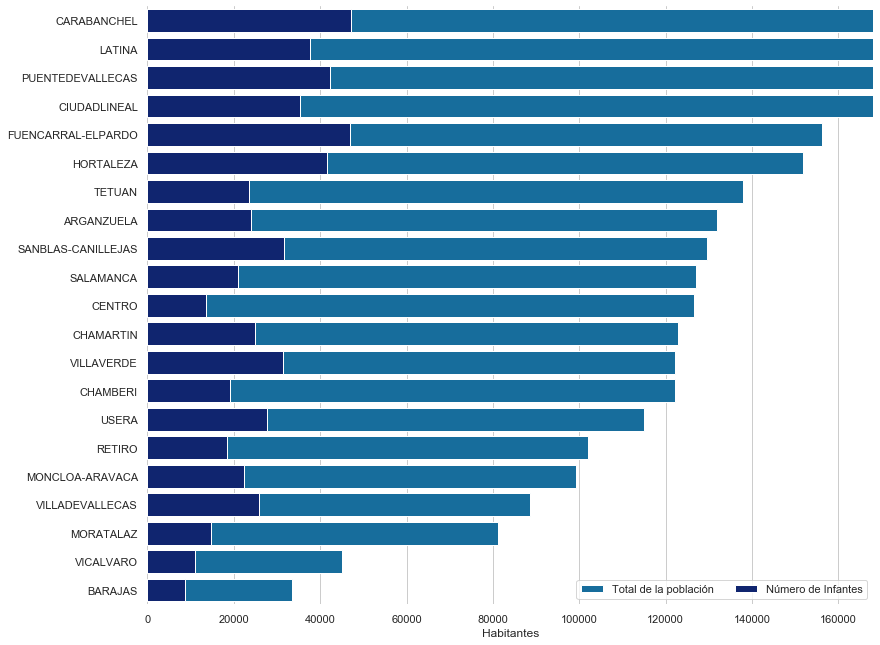

In [9]:
# Se plotea la gráfica para ver el barrio

sns.set(style="whitegrid")
sns.set_color_codes("colorblind")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_jovenes_distrito,
            label="Total de la población", color="b")

sns.set_color_codes("dark")
q = sns.barplot(y="Distrito" , x='Infantes', data=numero_jovenes_distrito,
            label="Número de Infantes",  color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 168000), ylabel="",
       xlabel="Habitantes")
sns.despine(left=True, bottom=True)